In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
plt.rcParams['figure.facecolor'] = 'white'

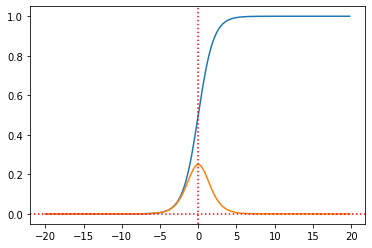

In [ ]:
def sigmoid(x):
  return (1/(1+np.exp(-x)))
 
a = np.arange(-20,20,.2)
z = sigmoid(a)*(1-sigmoid(a))

plt.plot(a, sigmoid(a), label = 'sigmoid')
plt.plot(a,z, label='derivative')
plt.axhline(0,color = 'r', linestyle = ':')
plt.axvline(0,color = 'r', linestyle = ':')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


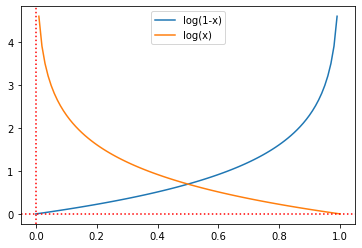

In [ ]:
x = np.linspace(0,1,100)

plt.plot(p, -np.log(1-x), label='log(1-x)')
plt.plot(p, -np.log(x), label='log(x)')
plt.axhline(0,color = 'r', linestyle = ':')
plt.axvline(0,color = 'r', linestyle = ':')
plt.legend()
plt.show()

In [ ]:
class LogisticRegression():
 
  def __init__(self, learning_rate = 0.01, epochs=500, plot =False):
    self.learning_rate = learning_rate
    self.epochs = epochs
    self.weights = None
    self.bias = None
    self.cost = np.zeros((self.epochs))
    self.plot = plot
 
  def sigmoid(self,z):
    return (1/(1+np.exp(-z)))
 
  def predict_prob(self,x):
    z = np.dot(x,self.weights) + self.bias             # for dot product (500,10)*(10,)  + 1
    return (self.sigmoid(z))


  def cost_function(self, x, y, y_hat):
    c = (1/len(y))* sum(-y*np.log(y_hat) - (1-y)*np.log(1-y_hat))
    return c
    

  def plot_function(self,x,y,z, y_hat,Cost):
    w = np.linspace(0,1,self.epochs)
    #w = np.linspace(-self.cost[0], self.cost[0], self.epochs)
    line = np.dot(x,self.weights) + self.bias

    color = ['red' if i == 0 else 'green' for i in y]
    plt.figure(figsize = (12,4))

    plt.subplot(1,3,1)
    plt.scatter(x,z, color = color)
    plt.plot(x,line, color = 'red')
    plt.title('Dataset')

    plt.subplot(1,3,2)
    plt.scatter(x,y)
    plt.plot(x,y_hat, color = 'red')
    plt.title('Gradient Decent trying hard to fit line')
 
    plt.subplot(1,3,3)
    plt.plot(w, -np.log(1-w), label='log(1-x)')
    plt.plot(w, -np.log(w), label='log(x)')
    plt.scatter(self.weights ,Cost, color = 'red')
    plt.title('cost function')
    plt.show()
  
 
  def fit(self,x,y,z):
    
    # x.shape = (500,10)   500 samples and 10 features
    n_samples,n_features = x.shape      
    
    self.weights = np.zeros((n_features,))               # shape = (10,)
    self.bias = np.zeros(1)                              #shape = (1,)
        
 
    for epoch in range(self.epochs): 
      
      y_hat = self.predict_prob(x)       #shape = (500,)
 
      self.cost[epoch] = self.cost_function(x, y, y_hat)
      
 
      if epoch % 100 == 0:
        print('epoch:',epoch,'cost:',self.cost[epoch])
        
        if self.plot:
          self.plot_function(x,y,z, y_hat, self.cost[epoch])
 
      # for dot product (10,500)*(500,)
      dw = np.dot(x.T, (y_hat - y))         #shape = (10,)
      db = sum(y_hat - y)                     #shape = (1,)
 
      self.weights -= self.learning_rate * dw
      self.bias -= self.learning_rate * db
  
 
    self.intercept_ = self.bias
    self.coef_ = self.weights
    self.cost_ = self.cost
    
  def predict(self,x):
    y_hat = self.predict_prob(x)
    y_pred = [1 if i>0.5 else 0 for i in y_hat ]
    return y_pred
 


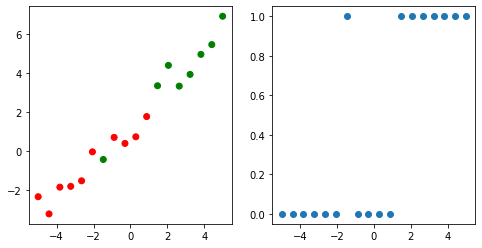

In [ ]:
x = np.linspace(-5,5,18)
y = x  + np.random.normal(1,1,size=18)
z = np.zeros(y.shape)
z[y>2] = 1
z[x<-1] = 1
z[x<-2] = 0 

color= ['red' if i == 0 else 'green' for i in z]
plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
plt.scatter(x,y, color = color)

plt.subplot(1,2,2)
plt.scatter(x,z)
plt.show()

epoch: 0 cost: 0.6931471805599453


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in log


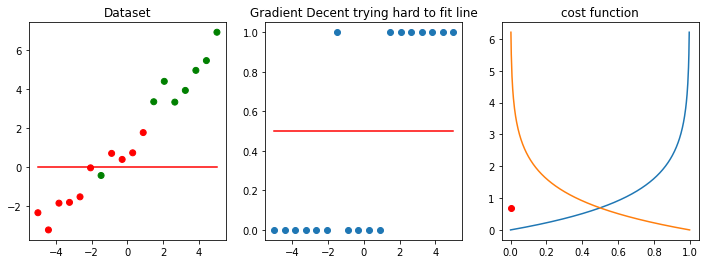

epoch: 100 cost: 0.2837965413930605


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in log


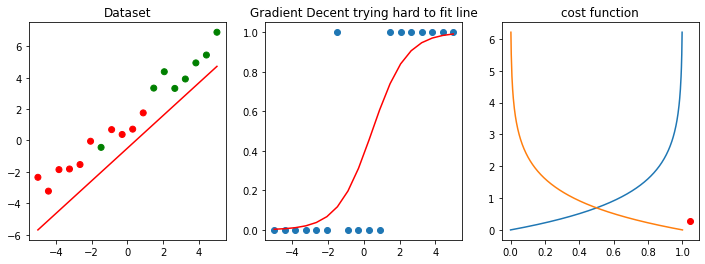

epoch: 200 cost: 0.282928433996106


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in log


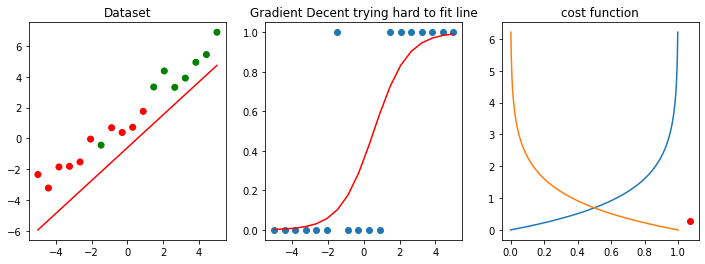

epoch: 300 cost: 0.2828735620284824


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in log


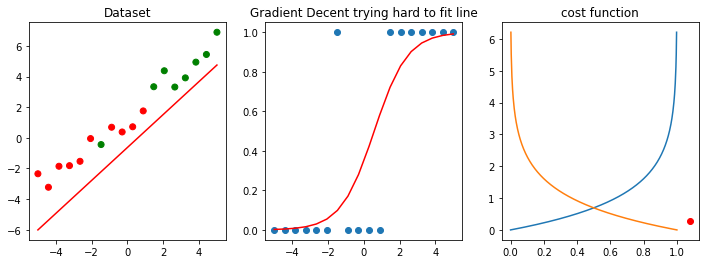

epoch: 400 cost: 0.2828697921572481


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in log


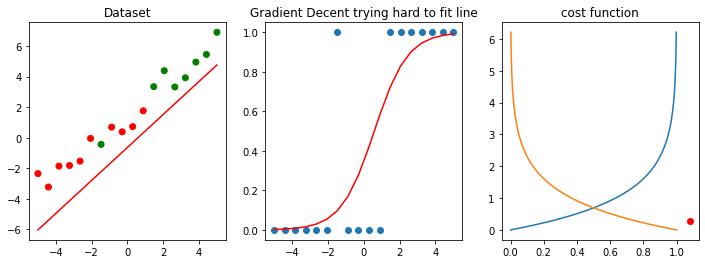

In [ ]:
m = LogisticRegression( plot = True)
m.fit(x[:,np.newaxis], z, y)

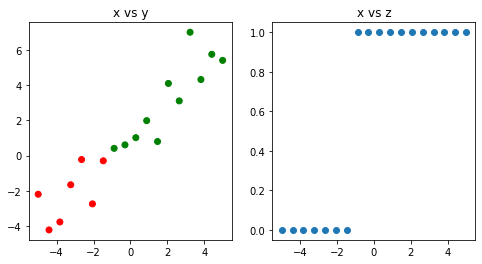

In [ ]:
x = np.linspace(-5,5,18)
y = x  + np.random.normal(1,1,size=18)
z = np.zeros(y.shape)
z[y>0] = 1

color= ['red' if i == 0 else 'green' for i in z]
plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
plt.scatter(x,y, color = color)
plt.title('x vs y')

plt.subplot(1,2,2)
plt.scatter(x,z)
plt.title('x vs z')
plt.show()

epoch: 0 cost: 0.6931471805599453


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in log


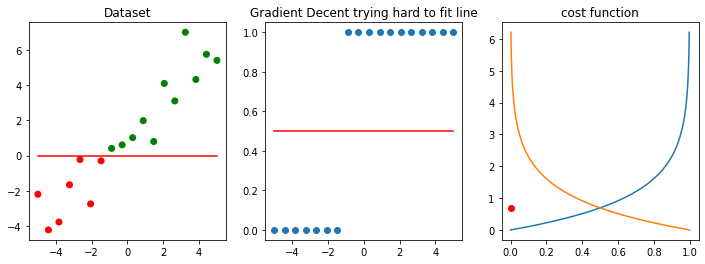

epoch: 100 cost: 0.11069211780454873


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in log


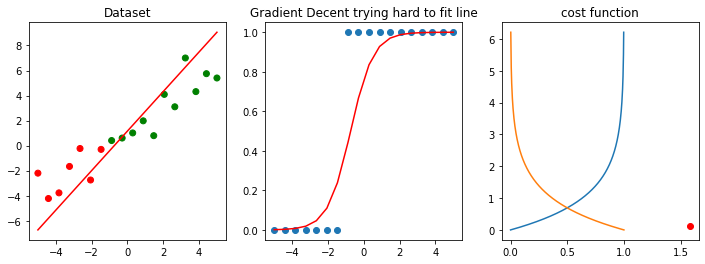

epoch: 200 cost: 0.08467544955292994


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in log


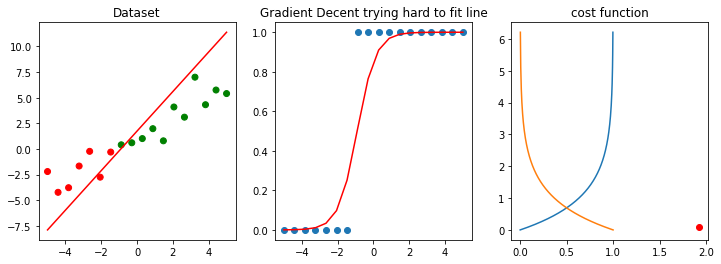

epoch: 300 cost: 0.07204083904707462


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in log


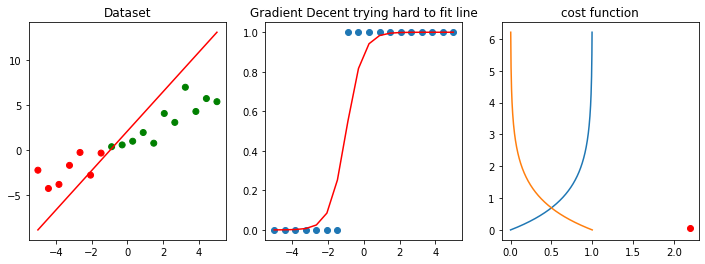

epoch: 400 cost: 0.06413180284341753


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in log


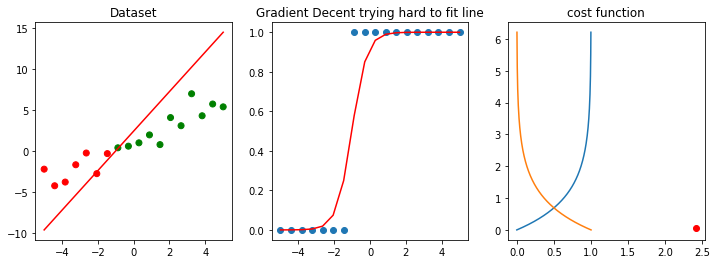

In [ ]:
m = LogisticRegression( plot = True)
m.fit(x[:,np.newaxis], z, y)

##Comparing with scikit learn

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as lr
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import pandas as pd



dataset = load_breast_cancer()

X = dataset.data
y = dataset.target
z = np.zeros(y.shape[0])
    
X_train, X_test, y_train, y_test = train_test_split(\
                X, y, test_size=0.3, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#training
my_regressor = LogisticRegression()
my_regressor.fit(X_train, y_train, z)

sklearn_regressor = lr()
sklearn_regressor.fit(X_train, y_train)

#training prediction
my_pred_train = my_regressor.predict(X_train)
sklearn_pred_train = sklearn_regressor.predict(X_train)


#testing prediction
my_pred_test = my_regressor.predict(X_test)
sklearn_pred_test = sklearn_regressor.predict(X_test)


print('Comparing scores:\n')

print('my prediction train accuracy:', accuracy_score(y_train, my_pred_train))
print('sklearn prediction train accuracy:', accuracy_score(y_train, sklearn_pred_train))
print()
print('my prediction test accuracy:', accuracy_score(y_test, my_pred_test))
print('sklearn prediction test accuracy:', accuracy_score(y_test, sklearn_pred_test))

epoch: 0 cost: 0.6931471805599467
epoch: 100 cost: 0.13656929741920537
epoch: 200 cost: 0.11018720045925061
epoch: 300 cost: 0.09794089557650791
epoch: 400 cost: 0.09050854917568422
Comparing scores:

my prediction train accuracy: 0.9798994974874372
sklearn prediction train accuracy: 0.9673366834170855

my prediction test accuracy: 0.9824561403508771
sklearn prediction test accuracy: 0.9649122807017544


#Yeah...!! :) 